## Predicting graduate addmissions linear regression

### Importing Jupyter notbook packages

In [89]:
# import python packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# import statsmodels 
import statsmodels.api as sm
import statsmodels.formula.api as smf

# import sklearn linear models 

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.model_selection import cross_val_score, train_test_split

from sklearn.preprocessing import StandardScaler

%matplotlib inline

### Reading UCLA Graduate Addmission Dataset: 

*Source* https://www.kaggle.com/mohansacharya/graduate-admissions/downloads/graduate-admissions.zip/2
-- Columns
SOP - Statement of Purpose
LOR - Letter of Recommendation 

In [3]:
columns = ['serial_no', 'GRE_score', 'TOEFL_score', 'university_rating', 'SOP', 'LOR', 'CGPA', 'research', 'chance_of_addmission']
admission = pd.read_csv('data/Admission_Predict_Ver1.1.csv', names=columns, header=0)
print(admission.shape)
admission.head()

(500, 9)


,serial_no,GRE_score,TOEFL_score,university_rating,SOP,LOR,CGPA,research,chance_of_addmission
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
# check column data types and see all columns are int/float types
admission.dtypes

serial_no                 int64
GRE_score                 int64
TOEFL_score               int64
university_rating         int64
SOP                     float64
LOR                     float64
CGPA                    float64
research                  int64
chance_of_addmission    float64
dtype: object

In [5]:
# describe the data
admission.describe().T

,count,mean,std,min,25%,50%,75%,max
serial_no,500.0,250.50000,144.481833,1.00,125.7500,250.50,375.25,500.00
GRE_score,500.0,316.47200,11.295148,290.00,308.0000,317.00,325.00,340.00
TOEFL_score,500.0,107.19200,6.081868,92.00,103.0000,107.00,112.00,120.00
university_rating,500.0,3.11400,1.143512,1.00,2.0000,3.00,4.00,5.00
SOP,500.0,3.37400,0.991004,1.00,2.5000,3.50,4.00,5.00
LOR,500.0,3.48400,0.925450,1.00,3.0000,3.50,4.00,5.00
CGPA,500.0,8.57644,0.604813,6.80,8.1275,8.56,9.04,9.92
research,500.0,0.56000,0.496884,0.00,0.0000,1.00,1.00,1.00
chance_of_addmission,500.0,0.72174,0.141140,0.34,0.6300,0.72,0.82,0.97


### Data Visualization

(500, 9)


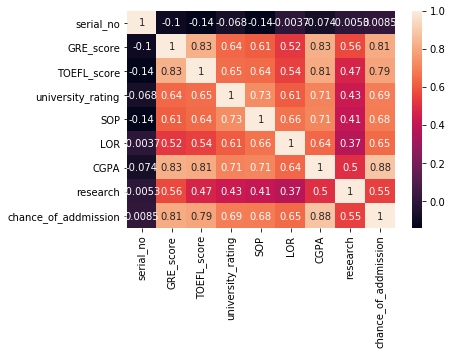

In [6]:
# see heatmap visualization
sns.heatmap(admission.corr(),annot = True)
print(admission.shape)
plt.show()

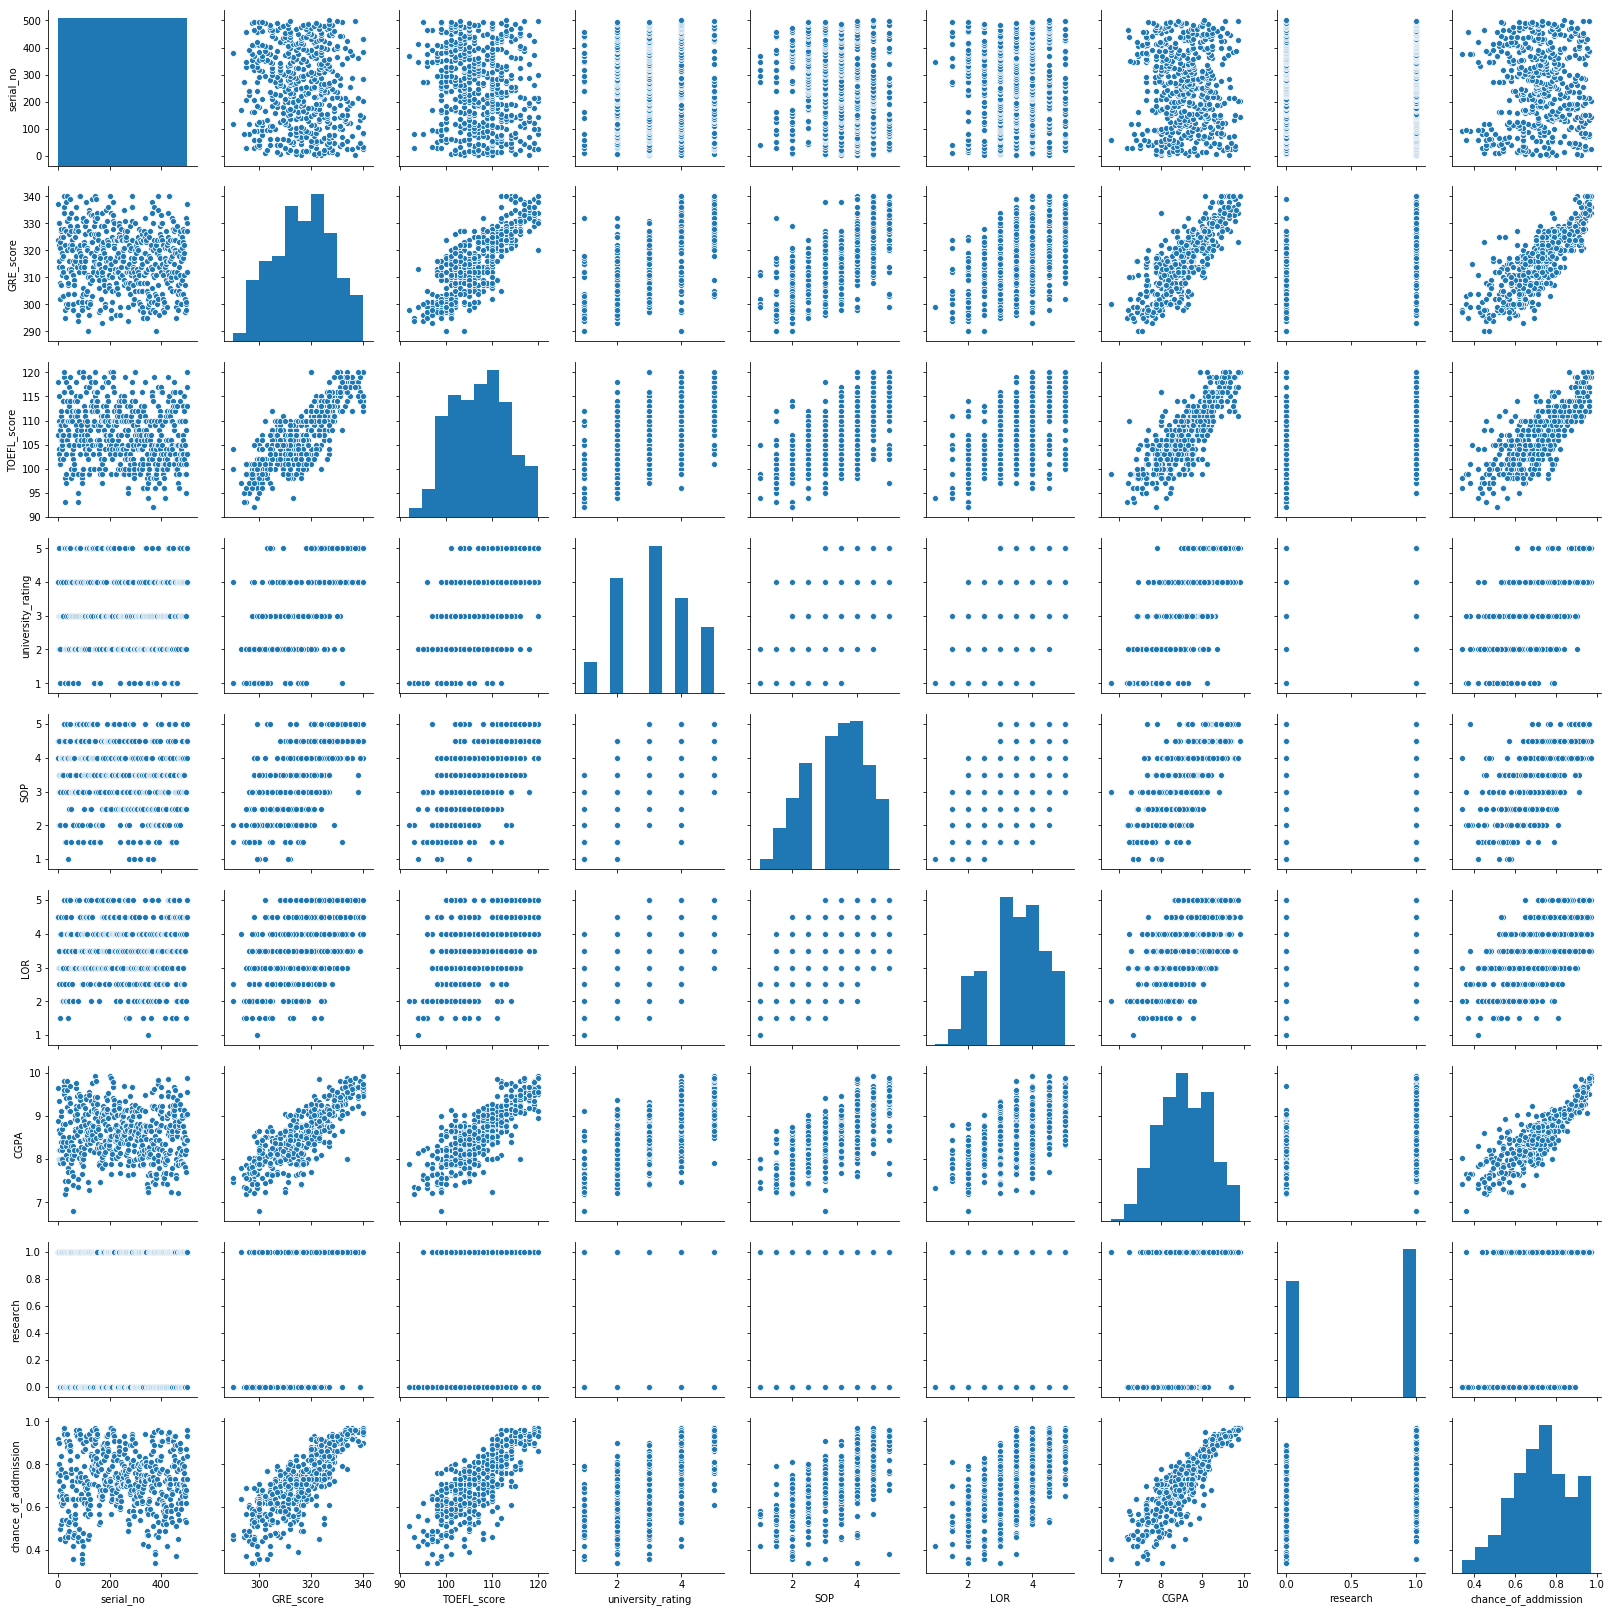

In [7]:
# see the correlation between columns 
sns.pairplot(admission)

### Project Question Formulation

What is the relationsip between graduate addmission and TOFEL, GRE and CGPA scores?

# Step 1 -- Get the data 

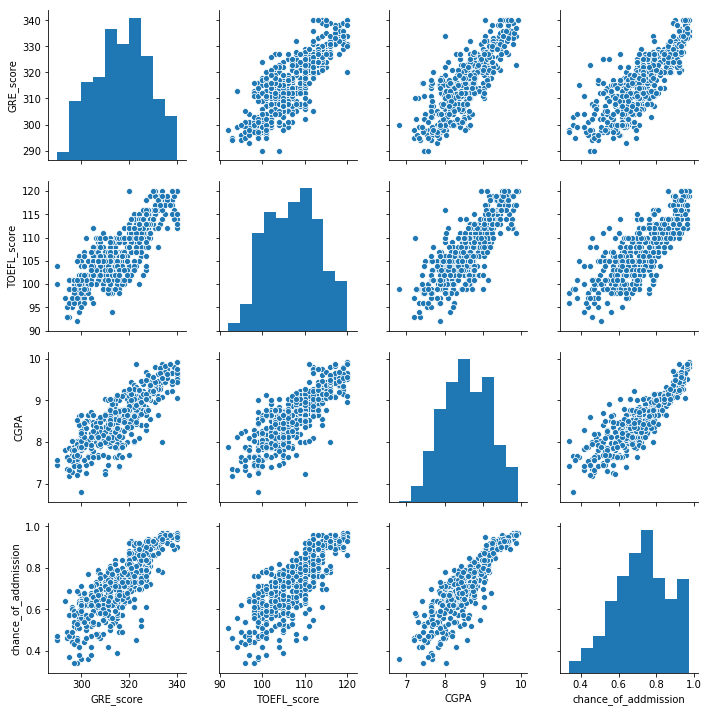

In [8]:
# selecting only the four columns and show in a scatter plot
admission_df = admission[['GRE_score','TOEFL_score','CGPA','chance_of_addmission']]
sns.pairplot(admission_df)
# scatter_matrix(adm_new, figsize=(15,10))
# plt.show()

(500, 4)


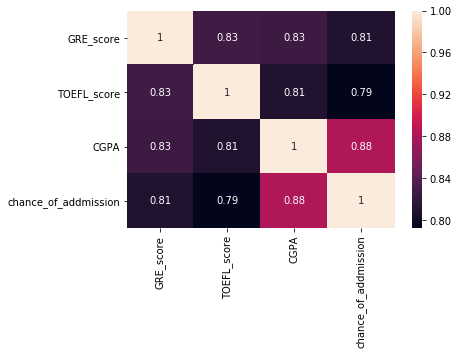

In [9]:
# see heatmap visualization
sns.heatmap(admission_df.corr(),annot = True)
print(admission_df.shape)
plt.show()

In [12]:
admission_df.head()

,GRE_score,TOEFL_score,CGPA,chance_of_addmission
0,337,118,9.65,0.92
1,324,107,8.87,0.76
2,316,104,8.00,0.72
3,322,110,8.67,0.80
4,314,103,8.21,0.65


In [10]:
admission_df.describe().T

,count,mean,std,min,25%,50%,75%,max
GRE_score,500.0,316.47200,11.295148,290.00,308.0000,317.00,325.00,340.00
TOEFL_score,500.0,107.19200,6.081868,92.00,103.0000,107.00,112.00,120.00
CGPA,500.0,8.57644,0.604813,6.80,8.1275,8.56,9.04,9.92
chance_of_addmission,500.0,0.72174,0.141140,0.34,0.6300,0.72,0.82,0.97


In [11]:
admission_df.dtypes

GRE_score                 int64
TOEFL_score               int64
CGPA                    float64
chance_of_addmission    float64
dtype: object

In [13]:
admission_df.isna().sum()

GRE_score               0
TOEFL_score             0
CGPA                    0
chance_of_addmission    0
dtype: int64

In [15]:
admission_df.shape

(500, 4)

# Step 2 -- Train/Test Split
#### Target is Chance of addmission 

In [16]:
# create y and X as the target and the features
y = admission_df['chance_of_addmission']
X = admission_df.drop(columns=['chance_of_addmission'])
print(X.shape)
print(y.shape)

(500, 3)
(500,)


In [17]:
# split data into test and train sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [18]:
# check training and test sets 
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((375, 3), (375,), (125, 3), (125,))

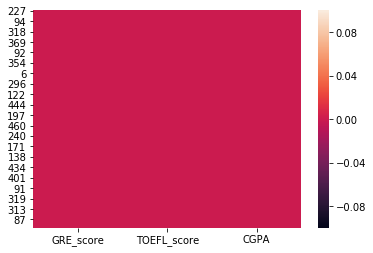

In [19]:
# check zeroes in the training data using seaborn heatmap function 
sns.heatmap(X_train==0) # no zeroes

# Step 3 -- Exploratory Data Analysis

only training data is used here 

#### let's clean the data first

In [20]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375 entries, 227 to 102
Data columns (total 3 columns):
GRE_score      375 non-null int64
TOEFL_score    375 non-null int64
CGPA           375 non-null float64
dtypes: float64(1), int64(2)
memory usage: 11.7 KB


In [21]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
GRE_score,375.0,316.733333,10.990192,293.0,309.00,317.00,325.00,340.00
TOEFL_score,375.0,107.309333,6.115230,92.0,103.00,107.00,112.00,120.00
CGPA,375.0,8.582000,0.601840,6.8,8.13,8.57,9.04,9.92


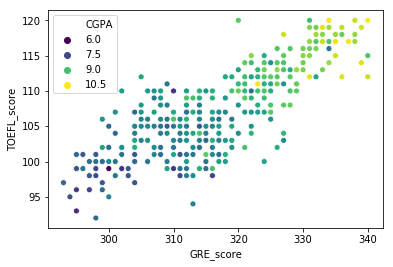

In [22]:
# X_train.
sns.scatterplot(X_train['GRE_score'], X_train['TOEFL_score'], X_train['CGPA'], palette='viridis')

In [23]:
print(X_train['GRE_score'].nunique())
print(X_train['TOEFL_score'].nunique())
print(X_train['CGPA'].nunique())
print(y_train.nunique())

48
29
161
59


In [24]:
y_train.describe().T

count    375.000000
mean       0.723680
std        0.141559
min        0.340000
25%        0.630000
50%        0.730000
75%        0.825000
max        0.970000
Name: chance_of_addmission, dtype: float64

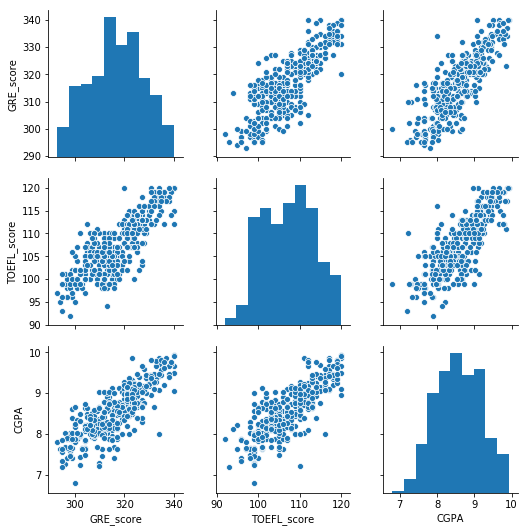

In [25]:
# create scatterplot matrix for the training data 
sns.pairplot(X_train)

In [26]:
# create a log variable and add it at th end 
# X_train_log = pd.concat([X_train, X_train.loc[:].applymap(np.log).add_suffix('_log')],axis=1)
X_train_log = X_train.loc[:].applymap(np.log).add_suffix('_log')
X_train_log.head()

,GRE_score_log,TOEFL_score_log,CGPA_log
227,5.743003,4.700480,2.143589
417,5.755742,4.634729,2.038620
203,5.811141,4.787492,2.289500
126,5.777652,4.727388,2.232163
329,5.693732,4.564348,2.065596


#### Look at the distribution of our target

/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


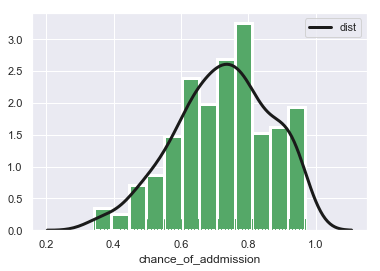

In [88]:
# histogram of y_train 
sns.distplot(y_train, rug=True, rug_kws={'color': 'g'},
             kde_kws={'color': 'k', 'lw': 3, 'label':'dist'},
             hist_kws = {'linewidth': 3, 'alpha': 1, 'color': 'g'})
# or the simplest distplot is 
# sns.distplot(y_train)

# Step 4 -- Messy Model

###  **1. Using Statsmodels**

#### 1.1 using statsmodels.api

In [49]:
# linear regression using statsmodels
f = 'chance_of_addmission ~ {}'.format('+'.join(X_train.columns))
print(f + '\n')  # chance_of_addmission ~ GRE_score+TOEFL_score+CGPA
model = sm.OLS(y_train, X_train).fit()
print(model.summary()) # get summary of the model

chance_of_addmission ~ GRE_score+TOEFL_score+CGPA

                             OLS Regression Results                             
Dep. Variable:     chance_of_addmission   R-squared:                       0.988
Model:                              OLS   Adj. R-squared:                  0.988
Method:                   Least Squares   F-statistic:                 1.048e+04
Date:                  Sun, 08 Sep 2019   Prob (F-statistic):               0.00
Time:                          14:40:00   Log-Likelihood:                 416.32
No. Observations:                   375   AIC:                            -826.6
Df Residuals:                       372   BIC:                            -814.9
Df Model:                             3                                         
Covariance Type:              nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------

#### Simple linear regression between CGPA and graduate addmission 

0.7750280300056112


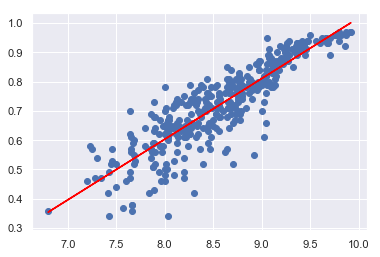

In [137]:
# checking a linear regeration 
X_train_cgpa = pd.DataFrame(X_train['CGPA'])
type(X_train_cgpa)
cgpa_lr = linrig.fit(X_train_cgpa, y_train)
print(cgpa_lr.score(X_train_cgpa,y_train))

y_ols_pred = linrig.predict(X_train_cgpa)

# Y_pred = linear_regressor.predict(X) 
plt.scatter(X_train_cgpa, y_train)
plt.plot(X_train_cgpa, y_ols_pred, color='red')
# plt.show()

#### 1.2 using statsmodels.formula.api

In [48]:
# linear regression using statsmodels formula api
concated_admission = pd.concat([X_train, pd.DataFrame(y_train)],axis=1)
ff = 'chance_of_addmission ~ {}'.format('+'.join(concated_admission.columns[:-1]))
print(ff+'\n')
model_ff = smf.ols(formula=ff, data=concated_admission).fit()
print(model_ff.summary())


chance_of_addmission ~ GRE_score+TOEFL_score+CGPA

                             OLS Regression Results                             
Dep. Variable:     chance_of_addmission   R-squared:                       0.808
Model:                              OLS   Adj. R-squared:                  0.806
Method:                   Least Squares   F-statistic:                     519.3
Date:                  Sun, 08 Sep 2019   Prob (F-statistic):          2.19e-132
Time:                          14:39:07   Log-Likelihood:                 510.62
No. Observations:                   375   AIC:                            -1013.
Df Residuals:                       371   BIC:                            -997.5
Df Model:                             3                                         
Covariance Type:              nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------

### **2. Using Sklearn**

In [56]:
# check the shape and type here
print(X_train.shape), print(y_train.shape)
print(type(y_train)), print(type(X_train))

(375, 3)
(375,)
<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


(None, None)

In [59]:
# initialize a linear regression model in sklearn
linrig = LinearRegression()
# fit linear model to training data
linrig.fit(X_train, y_train)
print(linrig.coef_)
print(linrig.intercept_)
print(linrig.score(X_train, y_train)) # this is the r squared value from sklearn

[0.00269146 0.00349853 0.1382501 ]
-1.69068176917762
0.807648677086558


In [110]:
X_train.columns

Index(['GRE_score', 'TOEFL_score', 'CGPA'], dtype='object')

/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


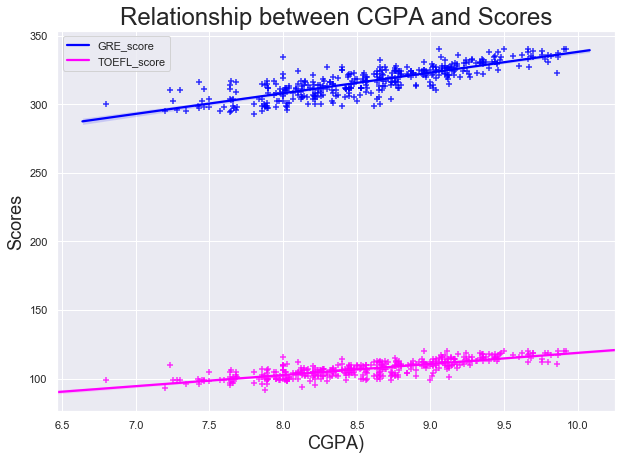

In [111]:
import seaborn as sns

# Regression plot using seaborn.
fig = plt.figure(figsize=(10,7))
sns.regplot(x=X_train.CGPA,y=X_train.GRE_score,color='blue', marker='+')
sns.regplot(x=X_train.CGPA,y=X_train.TOEFL_score,color='magenta', marker='+')

# Legend, title and labels.
plt.legend(labels=['GRE_score','TOEFL_score'])
plt.title('Relationship between CGPA and Scores', size=24)
plt.xlabel('CGPA)', size=18)
plt.ylabel('Scores', size=18);

# Step 5 -- Model Evaluation

In [61]:
# get summary statistics from statsmodels
print(model.summary())

                             OLS Regression Results                             
Dep. Variable:     chance_of_addmission   R-squared:                       0.988
Model:                              OLS   Adj. R-squared:                  0.988
Method:                   Least Squares   F-statistic:                 1.048e+04
Date:                  Sun, 08 Sep 2019   Prob (F-statistic):               0.00
Time:                          14:56:50   Log-Likelihood:                 416.32
No. Observations:                   375   AIC:                            -826.6
Df Residuals:                       372   BIC:                            -814.9
Df Model:                             3                                         
Covariance Type:              nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
GRE_score      -0.0051      0.

In [64]:
# get r squared value from sklearn
print('The R^2 from sklearn is: ', np.round(linrig.score(X_train, y_train), 3))

The R^2 from sklearn is:  0.808


In [ ]:
# calculate adjusted r squared 
import modeling
modeling.adjusted_r_suared()


## Regularization 

### **1. Lasso Regularizer**

In [114]:
# conduct lasso regression on training data
lasso = Lasso(alpha = 10, max_iter= 10000)
lasso.fit(X_train, y_train)
# sample_models['ridge'] = ridge
print('lasso score:', lasso.score(X_train, y_train))

lasso score: 0.0


In [ ]:
# evaluation of lasso on training data

In [ ]:
# examine coefficients from lasso

### **2. Ridge Regularizer**

In [93]:
print(X_train.shape)
print(y_train.shape)

(375, 3)
(375,)


In [116]:
#conduct ridge regression on training data
ridge = Ridge(alpha = 10, max_iter= 10000)
ridge.fit(X_train, y_train)
# sample_models['ridge'] = ridge
print('Ridge score:', ridge.score(X_train, y_train))


Ridge score: 0.8034181170280151


### higher the alpha value, more restriction on the coefficients; low alpha > more generalization, coefficients are barely estricted and in this case linear and ridge regression resembles

Linear regression train score: 0.807648677086558
Ridge regression train score low alpha: 0.8076486702869391
Ridge regression train score high alpha: 0.7574368577675282


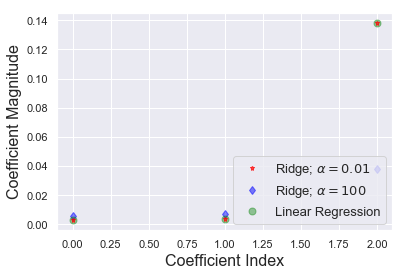

In [98]:
rr = Ridge(alpha=0.01) 
rr.fit(X_train, y_train)

train_score=linrig.score(X_train, y_train)
# test_score=lr.score(X_test, y_test)

rr100 = Ridge(alpha=100) #  comparison with alpha value
rr100.fit(X_train, y_train)

ridge_train_score = rr.score(X_train,y_train)
# ridge_test_score = rr.score(X_test, y_test)
ridge_train_score100 = rr100.score(X_train,y_train)
# ridge_test_score100 = rr100.score(X_test, y_test)
print("Linear regression train score:", train_score)
# print("linear regression test score:", test_score)
print("Ridge regression train score low alpha:", ridge_train_score)
# print "ridge regression test score low alpha:", Ridge_test_score
print("Ridge regression train score high alpha:", ridge_train_score100)
# print "ridge regression test score high alpha:", Ridge_test_score100


plt.plot(rr.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7) # zorder for ordering the markers
plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$') # alpha here is for transparency
plt.plot(linrig.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.show()


In [ ]:
# evaluation of ridge on training data

In [ ]:
# examine coefficients from ridge

# Step 6 -- Best Model Evaluation

In [ ]:
# apply data cleaning process to test set

In [ ]:
# run best model on test set

# Step 7 -- Model Interpretation